<a href="https://colab.research.google.com/github/jvataidee/PesquisaOperacional/blob/master/agregacao_sintese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**by: [João Ataíde](https://www.joaoataide.com)**
# **Métodos de Agregação e Síntese**

---



In [ ]:
#importar bibliotecas
import pandas as pd
import numpy as np
import os
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, product

# **Métodos Ordinais**

## **Método de Borda**


In [ ]:
criterios = ["Manutencao", "Customizacao", "Aderência"]

alt1 = [ "4°" , "2°", "3°"]
alt2 = [ "2°" , "4°", "1°"]
alt3 = [ "1°" , "1°", "2°"]
alt4 = [ "3°" , "3°", "4°"]

In [ ]:
matriz_decisao = pd.DataFrame([alt1, alt2, alt3, alt4], columns = criterios)

In [ ]:
matriz_decisao

,Manutencao,Customizacao,Aderência
0,4°,2°,3°
1,2°,4°,1°
2,1°,1°,2°
3,3°,3°,4°


### **Transformar Ordenal em Número**


In [ ]:
matriz_decisao_num = matriz_decisao.copy()

for coluna in criterios:
    for linha in range(len(matriz_decisao[coluna])):
        matriz_decisao_num[coluna][linha] = int(matriz_decisao_num[coluna][linha][0:1])

matriz_decisao_num

,Manutencao,Customizacao,Aderência
0,4,2,3
1,2,4,1
2,1,1,2
3,3,3,4


### **Coluna de soma e resultado**

In [ ]:
matriz_decisao_num["Soma"] = matriz_decisao_num["Manutencao"] + matriz_decisao_num["Customizacao"] + matriz_decisao_num["Aderência"] 

In [ ]:
resultado = matriz_decisao_num.sort_values("Soma").copy()
resultado["Resultado"] = ''

for i in range(len(resultado["Soma"])):
    resultado["Resultado"][i] = f'{i+1}°'

resultado

,Manutencao,Customizacao,Aderência,Soma,Resultado
2,1,1,2,4,3°
1,2,4,1,7,2°
0,4,2,3,9,1°
3,3,3,4,10,4°


## **Método Condorcet**


In [ ]:
criterios = ["Alternativa","Infra", "Serviço", "Acesso"]

#Em Escala de Likert
''' 5 Muito bom, 4 Bom, 3 Neutro, 2 Ruim, 1 Muito Ruim '''
alt1 = ["Alternativa 1", 2, 4, 3]
alt2 = ["Alternativa 2",1, 4, 5]
alt3 = ["Alternativa 3",5, 5, 5]
alt4 = ["Alternativa 4",3, 5, 2]

matriz_decisao = pd.DataFrame([alt1, alt2, alt3, alt4], columns = criterios)
matriz_decisao

,Alternativa,Infra,Serviço,Acesso
0,Alternativa 1,2,4,3
1,Alternativa 2,1,4,5
2,Alternativa 3,5,5,5
3,Alternativa 4,3,5,2


In [ ]:
alternativas = list(matriz_decisao.index)
criterios = list(matriz_decisao.columns[1:])
alternativas_combinadas =  list(combinations(alternativas, 2))
lista_alter = list(matriz_decisao.Alternativa)

In [ ]:
dataframes = {
    criterio: pd.DataFrame(data = 0, index = alternativas, columns = alternativas)
    for criterio in criterios
}

In [ ]:
for criterio, (altA, altB) in product(criterios, alternativas_combinadas):

    if matriz_decisao.at[altA, criterio] > matriz_decisao.at[altB, criterio]:
        dataframes[criterio].at[altA, altB] = 1

    elif matriz_decisao.at[altA, criterio] < matriz_decisao.at[altB, criterio]:
        dataframes[criterio].at[altA, altB] = -1

    else :
        dataframes[criterio].at[altA, altB] = 0

In [ ]:
for criterio in criterios:
    dataframes[criterio].reset_index()
    dataframes[criterio].columns =  lista_alter
    dataframes[criterio].index = lista_alter

In [ ]:
for criteiro in criterios:
    print(" ")
    print(criteiro)
    print(dataframes[criteiro])

 
Infra
               Alternativa 1  Alternativa 2  Alternativa 3  Alternativa 4
Alternativa 1              0              1             -1             -1
Alternativa 2              0              0             -1             -1
Alternativa 3              0              0              0              1
Alternativa 4              0              0              0              0
 
Serviço
               Alternativa 1  Alternativa 2  Alternativa 3  Alternativa 4
Alternativa 1              0              0             -1             -1
Alternativa 2              0              0             -1             -1
Alternativa 3              0              0              0              0
Alternativa 4              0              0              0              0
 
Acesso
               Alternativa 1  Alternativa 2  Alternativa 3  Alternativa 4
Alternativa 1              0             -1             -1              1
Alternativa 2              0              0              0              1
Alternativa

In [ ]:
matriz_soma = pd. DataFrame(sum([i.values for i in dataframes.values()]),
                            index = lista_alter,
                            columns = lista_alter)
matriz_soma

,Alternativa 1,Alternativa 2,Alternativa 3,Alternativa 4
Alternativa 1,0,0,-3,-1
Alternativa 2,0,0,-2,-1
Alternativa 3,0,0,0,2
Alternativa 4,0,0,0,0


### **Regra de valores**

In [ ]:
# Transformar valor por regra
def transform(valor):
    if valor >= 1:
        return 1
    elif valor == 0:
        return 0
    else:
        return -1

### **Matriz de decisão**

In [ ]:
matriz_decisao_nova = matriz_soma.applymap(transform)
matriz_decisao_nova

,Alternativa 1,Alternativa 2,Alternativa 3,Alternativa 4
Alternativa 1,0,0,-1,-1
Alternativa 2,0,0,-1,-1
Alternativa 3,0,0,0,1
Alternativa 4,0,0,0,0


In [ ]:
transposta = matriz_decisao_nova.T
transposta = transposta * -1
transposta

,Alternativa 1,Alternativa 2,Alternativa 3,Alternativa 4
Alternativa 1,0,0,0,0
Alternativa 2,0,0,0,0
Alternativa 3,1,1,0,0
Alternativa 4,1,1,-1,0


In [ ]:
valores_decisao = matriz_decisao_nova + transposta
valores_decisao

,Alternativa 1,Alternativa 2,Alternativa 3,Alternativa 4
Alternativa 1,0,0,-1,-1
Alternativa 2,0,0,-1,-1
Alternativa 3,1,1,0,1
Alternativa 4,1,1,-1,0


### **Matriz Final**

In [ ]:
matriz_final = pd.DataFrame(valores_decisao,
                            index = lista_alter,
                            columns = lista_alter)
matriz_final

,Alternativa 1,Alternativa 2,Alternativa 3,Alternativa 4
Alternativa 1,0,0,-1,-1
Alternativa 2,0,0,-1,-1
Alternativa 3,1,1,0,1
Alternativa 4,1,1,-1,0


### **Gerando Grafo de Decisão**

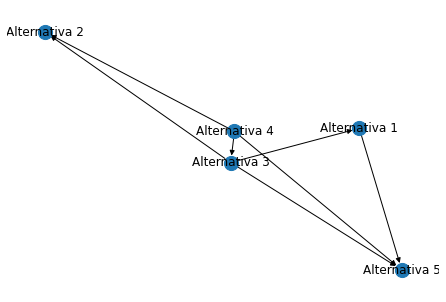

In [ ]:
G = nx.DiGraph()
G.add_nodes_from(lista_alter)

for i, j in list(product(lista_alter, lista_alter)):
    if matriz_final.at[i, j] == 1:
        G.add_weighted_edges_from([(i, j, 1)])

nx.draw(G, node_size =200, with_labels = True)
plt.show()

## **Método Copeland**


In [ ]:
criterios = ["Alternativa","Infra", "Serviço", "Acesso"]

#Em Escala de Likert
''' 5 Muito bom, 4 Bom, 3 Neutro, 2 Ruim, 1 Muito Ruim '''
alt1 = ["Alternativa 1", 3, 1, 5]
alt2 = ["Alternativa 2", 3, 2, 1]
alt3 = ["Alternativa 3", 5, 2, 3]
alt4 = ["Alternativa 4", 3, 5, 4]
alt5 = ["Alternativa 5", 3, 1, 4]

matriz_decisao = pd.DataFrame([alt1, alt2, alt3, alt4, alt5], columns = criterios)
matriz_decisao

,Alternativa,Infra,Serviço,Acesso
0,Alternativa 1,3,1,5
1,Alternativa 2,3,2,1
2,Alternativa 3,5,2,3
3,Alternativa 4,3,5,4
4,Alternativa 5,3,1,4


In [ ]:
alternativas = list(matriz_decisao.index)
criterios = list(matriz_decisao.columns[1:])
alternativas_combinadas =  list(combinations(alternativas, 2))
lista_alter = list(matriz_decisao.Alternativa)

In [ ]:
dataframes = {
    criterio: pd.DataFrame(data = 0, index = alternativas, columns = alternativas)
    for criterio in criterios
}

In [ ]:
for criterio, (altA, altB) in product(criterios, alternativas_combinadas):

    if matriz_decisao.at[altA, criterio] > matriz_decisao.at[altB, criterio]:
        dataframes[criterio].at[altA, altB] = 1

    elif matriz_decisao.at[altA, criterio] < matriz_decisao.at[altB, criterio]:
        dataframes[criterio].at[altA, altB] = -1

    else :
        dataframes[criterio].at[altA, altB] = 0

In [ ]:
for criterio in criterios:
    dataframes[criterio].reset_index()
    dataframes[criterio].columns =  lista_alter
    dataframes[criterio].index = lista_alter

In [ ]:
for criteiro in criterios:
    print(" ")
    print(criteiro)
    print(dataframes[criteiro])

 
Infra
               Alternativa 1  Alternativa 2  ...  Alternativa 4  Alternativa 5
Alternativa 1              0              0  ...              0              0
Alternativa 2              0              0  ...              0              0
Alternativa 3              0              0  ...              1              1
Alternativa 4              0              0  ...              0              0
Alternativa 5              0              0  ...              0              0

[5 rows x 5 columns]
 
Serviço
               Alternativa 1  Alternativa 2  ...  Alternativa 4  Alternativa 5
Alternativa 1              0             -1  ...             -1              0
Alternativa 2              0              0  ...             -1              1
Alternativa 3              0              0  ...             -1              1
Alternativa 4              0              0  ...              0              1
Alternativa 5              0              0  ...              0              0

[5 rows x 5

In [ ]:
matriz_soma = pd. DataFrame(sum([i.values for i in dataframes.values()]),
                            index = lista_alter,
                            columns = lista_alter)
matriz_soma

,Alternativa 1,Alternativa 2,Alternativa 3,Alternativa 4,Alternativa 5
Alternativa 1,0,0,-1,0,1
Alternativa 2,0,0,-2,-2,0
Alternativa 3,0,0,0,-1,1
Alternativa 4,0,0,0,0,1
Alternativa 5,0,0,0,0,0


### **Regra de valores**

In [ ]:
# Transformar valor por regra
def transform(valor):
    if valor >= 1:
        return 1
    elif valor == 0:
        return 0
    else:
        return -1

### **Matriz de decisão**

In [ ]:
matriz_decisao_nova = matriz_soma.applymap(transform)
matriz_decisao_nova

,Alternativa 1,Alternativa 2,Alternativa 3,Alternativa 4,Alternativa 5
Alternativa 1,0,0,-1,0,1
Alternativa 2,0,0,-1,-1,0
Alternativa 3,0,0,0,-1,1
Alternativa 4,0,0,0,0,1
Alternativa 5,0,0,0,0,0


In [ ]:
transposta = matriz_decisao_nova.T
transposta = transposta * -1
transposta

,Alternativa 1,Alternativa 2,Alternativa 3,Alternativa 4,Alternativa 5
Alternativa 1,0,0,0,0,0
Alternativa 2,0,0,0,0,0
Alternativa 3,1,1,0,0,0
Alternativa 4,0,1,1,0,0
Alternativa 5,-1,0,-1,-1,0


In [ ]:
valores_decisao = matriz_decisao_nova + transposta
valores_decisao

,Alternativa 1,Alternativa 2,Alternativa 3,Alternativa 4,Alternativa 5
Alternativa 1,0,0,-1,0,1
Alternativa 2,0,0,-1,-1,0
Alternativa 3,1,1,0,-1,1
Alternativa 4,0,1,1,0,1
Alternativa 5,-1,0,-1,-1,0


### **Matriz Final**

In [ ]:
matriz_final = pd.DataFrame(valores_decisao,
                            index = lista_alter,
                            columns = lista_alter)
matriz_final

,Alternativa 1,Alternativa 2,Alternativa 3,Alternativa 4,Alternativa 5
Alternativa 1,0,0,-1,0,1
Alternativa 2,0,0,-1,-1,0
Alternativa 3,1,1,0,-1,1
Alternativa 4,0,1,1,0,1
Alternativa 5,-1,0,-1,-1,0


### **Soma e Matriz Final**

In [ ]:
matriz_final["Soma"] = matriz_final.apply(np.sum, axis = 1)
matriz_final.sort_values(by = "Soma", inplace = True, ascending = False)
matriz_final

,Alternativa 1,Alternativa 2,Alternativa 3,Alternativa 4,Alternativa 5,Soma
Alternativa 4,0,1,1,0,1,3
Alternativa 3,1,1,0,-1,1,2
Alternativa 1,0,0,-1,0,1,0
Alternativa 2,0,0,-1,-1,0,-2
Alternativa 5,-1,0,-1,-1,0,-3


### **Gerando Grafo de Decisão**

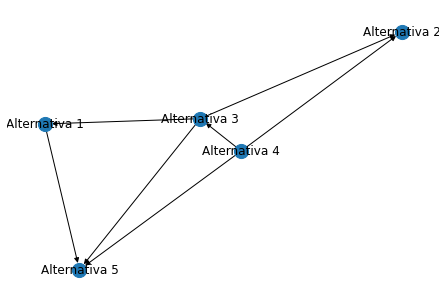

In [ ]:
G = nx.DiGraph()
G.add_nodes_from(lista_alter)

for i, j in list(product(lista_alter, lista_alter)):
    if matriz_final.at[i, j] == 1:
        G.add_weighted_edges_from([(i, j, 1)])

nx.draw(G, node_size =200, with_labels = True)
plt.show()

# **Métodos Cardinais**

## **Analytic Hierarchy Process AHP**